In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.utils.np_utils import to_categorical
from tensorflow.keras.utils import plot_model
from keras import regularizers
from sklearn.metrics import roc_curve, auc
from keras.layers import Activation
from keras import backend as K

In [2]:
# load saved df
df = pd.read_pickle('test.pkl')
print (df.keys())

Index([      b'pt_of_muon',      b'eta_of_muon',      b'phi_of_muon',
         b'energy_of_muon',        b'hcal_ieta',        b'hcal_iphi',
           b'IsolationR04',     b'IsolationR03',      b'ecal_3into3',
            b'hcal_3into3',         b'ecal_3x3',         b'hcal_1x1',
       'b'hcal_edepth1'_x', 'b'hcal_edepth2'_x', 'b'hcal_edepth3'_x',
       'b'hcal_edepth4'_x', 'b'hcal_edepth5'_x', 'b'hcal_edepth6'_x',
       'b'hcal_edepth7'_x', 'b'hcal_edepth1'_y', 'b'hcal_edepth2'_y',
       'b'hcal_edepth3'_y', 'b'hcal_edepth4'_y', 'b'hcal_edepth5'_y',
       'b'hcal_edepth6'_y', 'b'hcal_edepth7'_y'],
      dtype='object')


In [3]:
# filter events

df = df.loc[abs(df[b'hcal_ieta']) >= 23]
df = df.loc[abs(df[b'hcal_ieta']) <= 25]
print(df[b'hcal_ieta'])

df = df.loc[df["b'hcal_edepth1'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth1'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth2'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth2'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth3'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth3'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth4'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth4'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth5'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth5'_y"] > 0.00001]

df = df.loc[df["b'hcal_edepth6'_x"] > 0.00001]
df = df.loc[df["b'hcal_edepth6'_y"] > 0.00001]




0       -24
1        25
2       -24
3        24
4       -23
         ..
76212    24
76213   -25
76214    24
76216    23
76217    25
Name: b'hcal_ieta', Length: 59388, dtype: int32


In [4]:
df["b'hcal_edepth1'_x"]=np.log(10000*df["b'hcal_edepth1'_x"])
df["b'hcal_edepth1'_y"]=np.log(10000*df["b'hcal_edepth1'_y"])

df["b'hcal_edepth2'_x"]=np.log(10000*df["b'hcal_edepth2'_x"])
df["b'hcal_edepth2'_y"]=np.log(10000*df["b'hcal_edepth2'_y"])

df["b'hcal_edepth3'_x"]=np.log(10000*df["b'hcal_edepth3'_x"])
df["b'hcal_edepth3'_y"]=np.log(10000*df["b'hcal_edepth3'_y"])

df["b'hcal_edepth4'_x"]=np.log(10000*df["b'hcal_edepth4'_x"])
df["b'hcal_edepth4'_y"]=np.log(10000*df["b'hcal_edepth4'_y"])

df["b'hcal_edepth5'_x"]=np.log(10000*df["b'hcal_edepth5'_x"])
df["b'hcal_edepth5'_y"]=np.log(10000*df["b'hcal_edepth5'_y"])

df["b'hcal_edepth6'_x"]=np.log(10000*df["b'hcal_edepth6'_x"])
df["b'hcal_edepth6'_y"]=np.log(10000*df["b'hcal_edepth6'_y"])



In [5]:
# keep originals before scaling
df['hcal_edepth1_un'] = df["b'hcal_edepth1'_x"]
df['hcal_edepth2_un'] = df["b'hcal_edepth2'_x"]
df['hcal_edepth3_un'] = df["b'hcal_edepth3'_x"]
df['hcal_edepth4_un'] = df["b'hcal_edepth4'_x"]
df['hcal_edepth5_un'] = df["b'hcal_edepth5'_x"]
df['hcal_edepth6_un'] = df["b'hcal_edepth6'_x"]
df['hcal_edepth7_un'] = df["b'hcal_edepth7'_x"]

df['hcal_ieta_un'] = df[b'hcal_ieta']

In [6]:
# scaling input vars
cols_to_minmax =[b'pt_of_muon',b'eta_of_muon',b'phi_of_muon',b'energy_of_muon',b'hcal_ieta',
                b'hcal_iphi',     b'IsolationR04',     b'IsolationR03',
                b'ecal_3into3',      b'hcal_3into3', 
                b'ecal_3x3',         b'hcal_1x1',
               "b'hcal_edepth1'_x", "b'hcal_edepth2'_x", "b'hcal_edepth3'_x",
               "b'hcal_edepth4'_x", "b'hcal_edepth5'_x", "b'hcal_edepth6'_x",
               "b'hcal_edepth7'_x"]


df[cols_to_minmax] = df[cols_to_minmax].apply(lambda x: (x - x.min()) /  (x.max() - x.min()))

b'pt_of_muon'


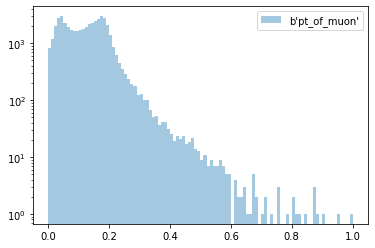

b'eta_of_muon'


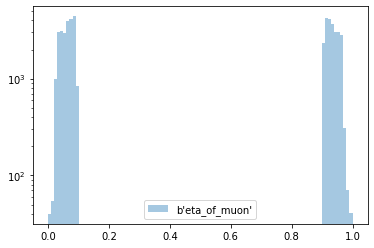

b'phi_of_muon'


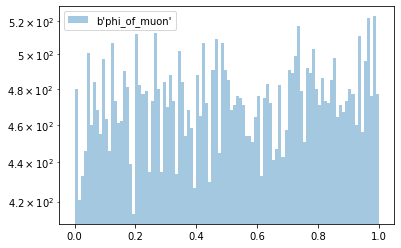

b'energy_of_muon'


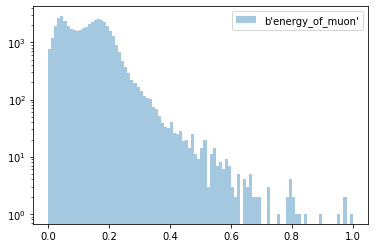

b'hcal_ieta'


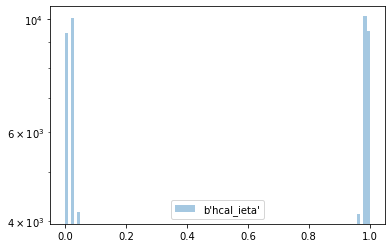

b'hcal_iphi'


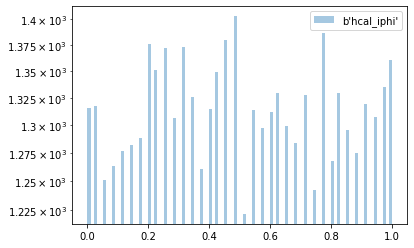

b'IsolationR04'


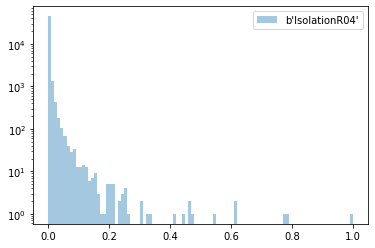

b'IsolationR03'


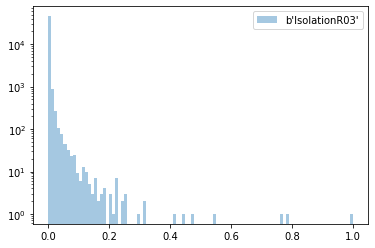

b'ecal_3into3'


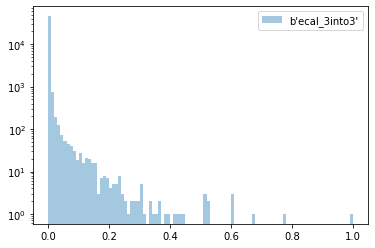

b'hcal_3into3'


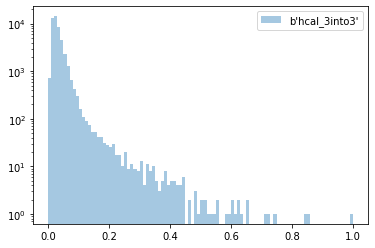

b'ecal_3x3'


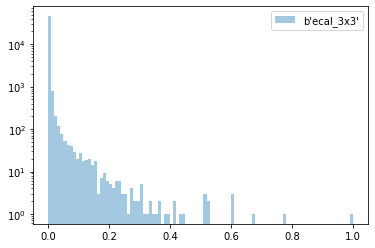

b'hcal_1x1'


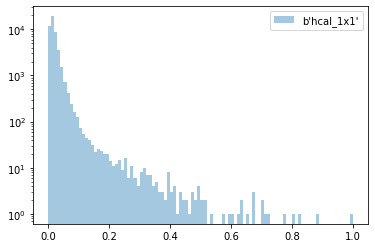

b'hcal_edepth1'_x


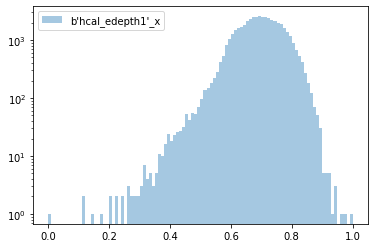

b'hcal_edepth2'_x


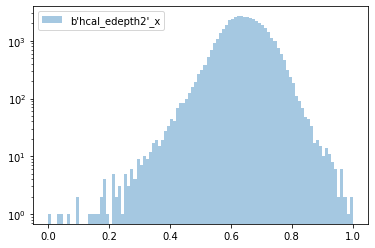

b'hcal_edepth3'_x


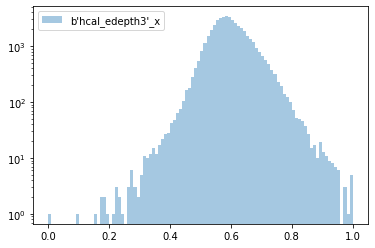

b'hcal_edepth4'_x


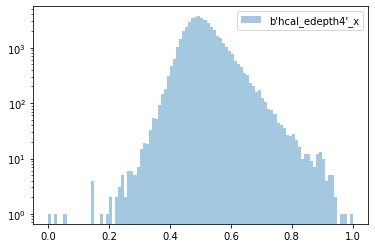

b'hcal_edepth5'_x


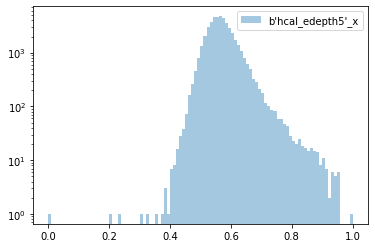

b'hcal_edepth6'_x


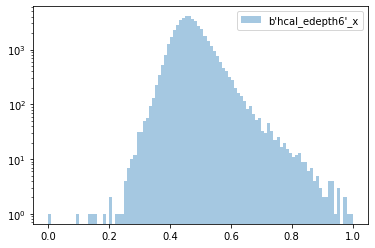

b'hcal_edepth7'_x


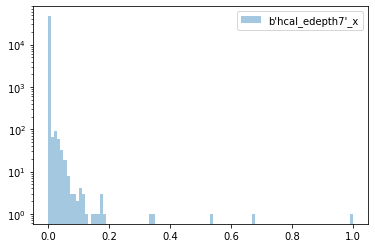

b'hcal_edepth1'_y


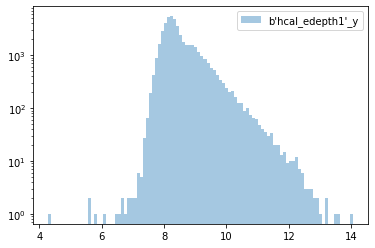

b'hcal_edepth2'_y


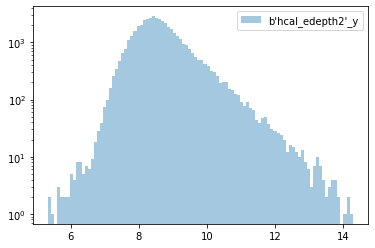

b'hcal_edepth3'_y


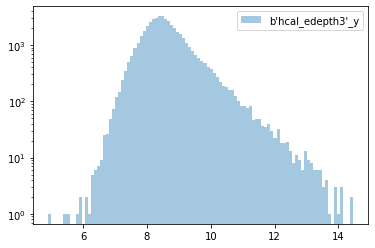

b'hcal_edepth4'_y


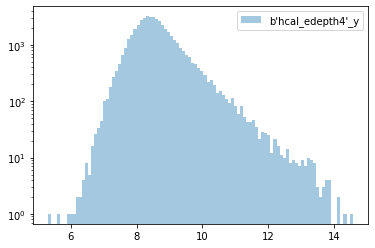

b'hcal_edepth5'_y


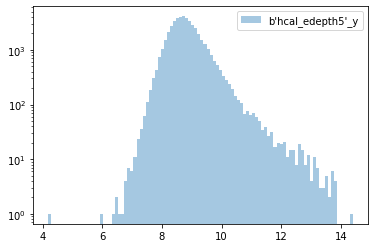

b'hcal_edepth6'_y


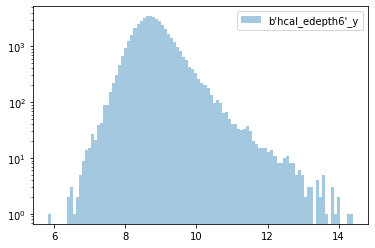

b'hcal_edepth7'_y


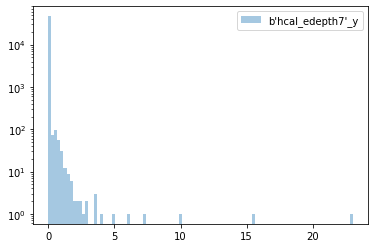

hcal_edepth1_un


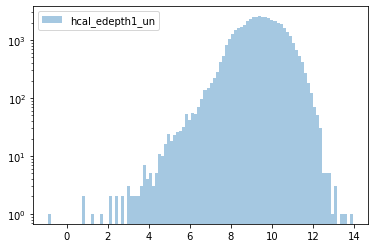

hcal_edepth2_un


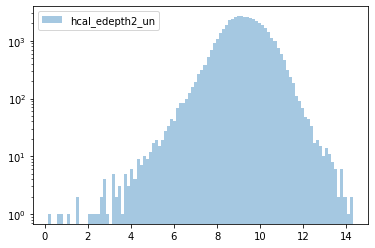

hcal_edepth3_un


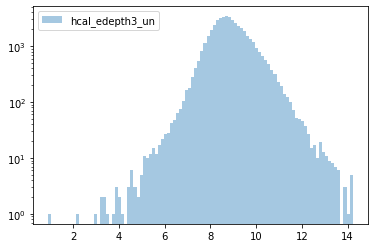

hcal_edepth4_un


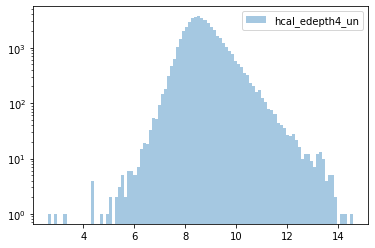

hcal_edepth5_un


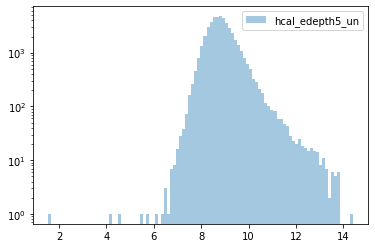

hcal_edepth6_un


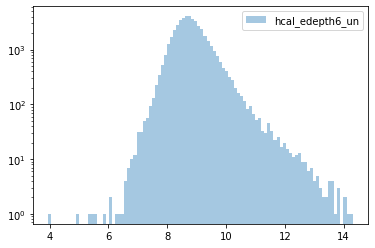

hcal_edepth7_un


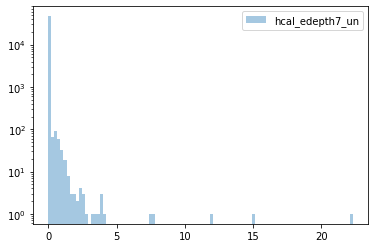

hcal_ieta_un


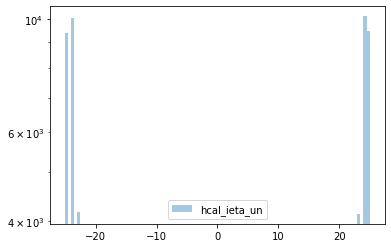

In [7]:
for i in (df.keys()):
    print (i)

    plt.hist(df[i],bins=100,label=str(i),alpha=0.4)
    plt.yscale("log")
    plt.legend()
    plt.show()

In [10]:
#print(df.keys)
data = df.values
print (data.shape[0])
ntest = 10000
testindx = data.shape[0] - ntest
X_train_depth1 = data[:testindx,np.r_[0:12,12]]   
X_train_depth2 = data[:testindx,np.r_[0:12,13]] 
X_train_depth3 = data[:testindx,np.r_[0:12,14]] 
X_train_depth4 = data[:testindx,np.r_[0:12,15]] 
X_train_depth5 = data[:testindx,np.r_[0:12,16]] 
X_train_depth6 = data[:testindx,np.r_[0:12,17]] 
X_train_depth7 = data[:testindx,np.r_[0:12,18]]

Y_train_depth1 = data[:testindx,19]
Y_train_depth2 = data[:testindx,20]
Y_train_depth3 = data[:testindx,21]
Y_train_depth4 = data[:testindx,22]
Y_train_depth5 = data[:testindx,23]
Y_train_depth6 = data[:testindx,24]
Y_train_depth7 = data[:testindx,25]

X_test = data[testindx:,:]
#print(X_test)
print (X_test.shape) 
print ("shape of X_train_depth1:",X_train_depth1.shape)
#print ("shape of X_train_depth2:",X_train_depth2.shape)
print ("shape of Y_train_depth2:",Y_train_depth1.shape)


47320
(10000, 34)
shape of X_train_depth1: (37320, 13)
shape of Y_train_depth2: (37320,)


true_hist_depth1[0] =  [    6 32189  5030    95]
sum weight_depth1: 100.0
true_hist_depth1 [    6 32189  5030    95]
weight_vals_depth1: [1.75098711e-02 1.12052732e-01 5.93289727e+00 9.39375401e+01]


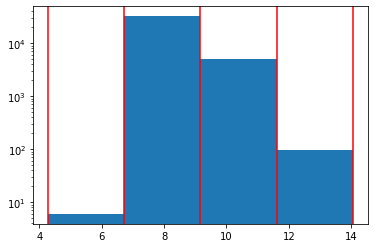

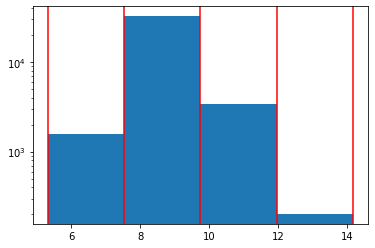

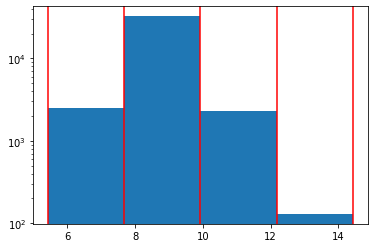

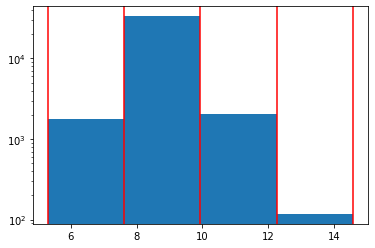

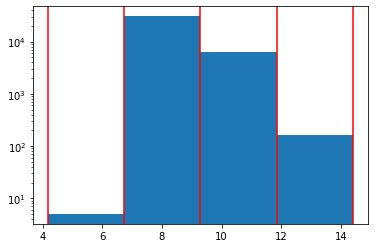

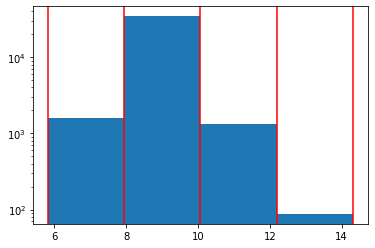

In [11]:
# sample weights
histoAR_depth1 = Y_train_depth1.copy()
histoAR_depth2 = Y_train_depth2.copy()
histoAR_depth3 = Y_train_depth3.copy()
histoAR_depth4 = Y_train_depth4.copy()
histoAR_depth5 = Y_train_depth5.copy()
histoAR_depth6 = Y_train_depth6.copy()
#histoAR_depth7 = Y_train_depth7.copy()

nbins = 4 ### works best[4 with no sqrt / 500 with sqrt normed] / 1000 with norm*100 / 4000 ok no sqrt

true_hist_depth1 = np.histogram(histoAR_depth1,bins = nbins,
                                range=(np.min(Y_train_depth1)-0.001,np.max(Y_train_depth1)+0.001))
true_hist_depth2 = np.histogram(histoAR_depth2,bins = nbins,
                                range=(np.min(Y_train_depth2)-0.001,np.max(Y_train_depth2)+0.001))
true_hist_depth3 = np.histogram(histoAR_depth3,bins = nbins,
                                range=(np.min(Y_train_depth3)-0.001,np.max(Y_train_depth3)+0.001))
true_hist_depth4 = np.histogram(histoAR_depth4,bins = nbins,
                                range=(np.min(Y_train_depth4)-0.001,np.max(Y_train_depth4)+0.001))
true_hist_depth5 = np.histogram(histoAR_depth5,bins = nbins,
                                range=(np.min(Y_train_depth5)-0.001,np.max(Y_train_depth5)+0.001))
true_hist_depth6 = np.histogram(histoAR_depth6,bins = nbins,
                                range=(np.min(Y_train_depth6)-0.001,np.max(Y_train_depth6)+0.001))
#true_hist_depth7 = np.histogram(histoAR_depth7,bins = nbins,
#                                range=(np.min(Y_train_depth7)-0.001,np.max(Y_train_depth7)+0.001))


binweight_depth1 = true_hist_depth1[0][np.digitize(histoAR_depth1,true_hist_depth1[1]) - 1]
binweight_depth2 = true_hist_depth2[0][np.digitize(histoAR_depth2,true_hist_depth2[1]) - 1]
binweight_depth3 = true_hist_depth3[0][np.digitize(histoAR_depth3,true_hist_depth3[1]) - 1]
binweight_depth4 = true_hist_depth4[0][np.digitize(histoAR_depth4,true_hist_depth4[1]) - 1]
binweight_depth5 = true_hist_depth5[0][np.digitize(histoAR_depth5,true_hist_depth5[1]) - 1]
binweight_depth6 = true_hist_depth6[0][np.digitize(histoAR_depth6,true_hist_depth6[1]) - 1]
#binweight_depth7 = true_hist_depth7[0][np.digitize(histoAR_depth7,true_hist_depth7[1]) - 1]


print ("true_hist_depth1[0] = ", true_hist_depth1[0])

binweight_depth1 = 1/binweight_depth1
binweight_depth2 = 1/binweight_depth2
binweight_depth3 = 1/binweight_depth3
binweight_depth4 = 1/binweight_depth4
binweight_depth5 = 1/binweight_depth5
binweight_depth6 = 1/binweight_depth6
#binweight_depth7 = 1/binweight_depth7

binweight_depth1 = 100*binweight_depth1/np.sum(np.unique(binweight_depth1)) ## 5000/5 ok
binweight_depth2 = 100*binweight_depth2/np.sum(np.unique(binweight_depth2))
binweight_depth3 = 100*binweight_depth3/np.sum(np.unique(binweight_depth3))
binweight_depth4 = 100*binweight_depth4/np.sum(np.unique(binweight_depth4))
binweight_depth5 = 100*binweight_depth5/np.sum(np.unique(binweight_depth5))
binweight_depth6 = 100*binweight_depth6/np.sum(np.unique(binweight_depth6))
#binweight_depth7 = 100*binweight_depth7/np.sum(np.unique(binweight_depth7))


print("sum weight_depth1:",np.sum(np.unique(binweight_depth1)))
print("true_hist_depth1",true_hist_depth1[0])
#print("binweight_depth1",binweight_depth1)
print("weight_vals_depth1:",np.unique(binweight_depth1))


binweight=[binweight_depth1, binweight_depth2, binweight_depth3, binweight_depth4, binweight_depth5,
           binweight_depth6]
    
histoAR = [histoAR_depth1, histoAR_depth2, histoAR_depth3, histoAR_depth4, histoAR_depth5,
           histoAR_depth6]
    
true_hist = [true_hist_depth1[1], true_hist_depth2[1], true_hist_depth3[1], true_hist_depth4[1], 
             true_hist_depth5[1], true_hist_depth6[1]]
    
for i in range (0,6):
    plt.hist(histoAR[i],bins=nbins)
        
    for j in true_hist[i]:
        plt.axvline(j,color='r')
        
    plt.yscale("log")
    plt.show()


In [12]:
import keras.backend as kb
def custom_loss_depth(preds, targets):
    return (kb.square(preds-targets))


In [21]:
PYTHONHASHSEED=0
from numpy.random import seed
seed(1)
import tensorflow as tf
tf.random.set_seed(2)
from keras.layers import concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense

print ("creating model=========>")

input1=Input(shape=(X_train_depth1.shape[1],))
input2=Input(shape=(X_train_depth2.shape[1],))
input3=Input(shape=(X_train_depth3.shape[1],))
input4=Input(shape=(X_train_depth4.shape[1],))
input5=Input(shape=(X_train_depth5.shape[1],))
input6=Input(shape=(X_train_depth6.shape[1],))


x1 = Dense(16, activation="relu")(input1)
x1 = Dense(8, activation="relu")(x1)
x1 = Dense(4, activation="relu")(x1)
x1 = Model(inputs=input1, outputs=x1)
x2 = Dense(32, activation="relu")(input2)
x2 = Dense(16, activation="relu")(x2)
x2 = Dense(4, activation="relu")(x2)
x2 = Model(inputs=input2, outputs=x2)
x3 = Dense(32, activation="relu")(input3)
x3 = Dense(16, activation="relu")(x3)
x3 = Dense(4, activation="relu")(x3)
x3 = Model(inputs=input3, outputs=x3)
x4 = Dense(32, activation="relu")(input4)
x4 = Dense(16, activation="relu")(x4)
x4 = Dense(4, activation="relu")(x4)
x4 = Model(inputs=input4, outputs=x4)
x5 = Dense(64, activation="relu")(input5)
x5 = Dense(16, activation="relu")(x5)
x5 = Dense(4, activation="relu")(x5)
x5 = Model(inputs=input5, outputs=x5)
x6 = Dense(32, activation="relu")(input6)
x6 = Dense(16, activation="relu")(x6)
x6 = Dense(4, activation="relu")(x6)
x6 = Model(inputs=input6, outputs=x6)

combined = tf.keras.layers.Concatenate()([x1.output, x2.output, x3.output, x4.output, 
                                          x5.output, x6.output])

z1 = Dense(64, activation="relu")(combined)
z1 = Dense(16, activation="relu")(z1)
z1 = Dense(6)(z1)



model = Model(inputs=[x1.input, x2.input, x3.input, x4.input, x5.input, x6.input], 
              outputs=z1)

model.compile(loss=custom_loss_depth,optimizer='adam')
model.summary()
print ("fitting now=========>")
history = model.fit([X_train_depth1, X_train_depth2, X_train_depth3, X_train_depth4, X_train_depth5, 
                     X_train_depth6], [Y_train_depth1, Y_train_depth2, Y_train_depth3, 
                     Y_train_depth4, Y_train_depth5, Y_train_depth6], batch_size=4000, 
                      epochs=1500, validation_split=0.2, verbose=1,sample_weight=binweight)


creating model=========>
Model: "model_13"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_8 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_9 (InputLayer)            [(None, 13)]         0                                            
__________________________________________________________________________________________________
input_10 (InputLayer)           [(None, 13)]         0                                            
__________________________________________________________________

8/8 [==============================] - 0s 10ms/step - loss: 0.2678 - val_loss: 0.1608
Epoch 18/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2600 - val_loss: 0.1589
Epoch 19/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2554 - val_loss: 0.1525
Epoch 20/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.2528 - val_loss: 0.1482
Epoch 21/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2399 - val_loss: 0.1526
Epoch 22/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.2387 - val_loss: 0.1510
Epoch 23/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.2418 - val_loss: 0.1699
Epoch 24/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2397 - val_loss: 0.1394
Epoch 25/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2225 - val_loss: 0.1464
Epoch 26/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.2258 - val_loss: 0.1522
Epoch 27/1500


8/8 [==============================] - 0s 10ms/step - loss: 0.1004 - val_loss: 0.0893
Epoch 100/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0995 - val_loss: 0.0831
Epoch 101/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.1003 - val_loss: 0.0744
Epoch 102/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0952 - val_loss: 0.0842
Epoch 103/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.1001 - val_loss: 0.0816
Epoch 104/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.1122 - val_loss: 0.0895
Epoch 105/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0928 - val_loss: 0.0742
Epoch 106/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0936 - val_loss: 0.0816
Epoch 107/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0909 - val_loss: 0.0727
Epoch 108/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0898 - val_loss: 0.0736
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0544 - val_loss: 0.0519
Epoch 181/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0539 - val_loss: 0.0513
Epoch 182/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0532 - val_loss: 0.0505
Epoch 183/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0554 - val_loss: 0.0541
Epoch 184/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0541 - val_loss: 0.0533
Epoch 185/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0551 - val_loss: 0.0544
Epoch 186/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0539 - val_loss: 0.0516
Epoch 187/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0537 - val_loss: 0.0498
Epoch 188/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0530 - val_loss: 0.0526
Epoch 189/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0557 - val_loss: 0.0569
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0431 - val_loss: 0.0436
Epoch 262/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0408 - val_loss: 0.0497
Epoch 263/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0409 - val_loss: 0.0430
Epoch 264/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0415 - val_loss: 0.0427
Epoch 265/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0416 - val_loss: 0.0457
Epoch 266/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0426 - val_loss: 0.0462
Epoch 267/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.0447
Epoch 268/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0402 - val_loss: 0.0462
Epoch 269/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0405 - val_loss: 0.0443
Epoch 270/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0407 - val_loss: 0.0409
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0341 - val_loss: 0.0436
Epoch 343/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0340 - val_loss: 0.0399
Epoch 344/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0334 - val_loss: 0.0388
Epoch 345/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0328 - val_loss: 0.0407
Epoch 346/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0321 - val_loss: 0.0394
Epoch 347/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0330 - val_loss: 0.0395
Epoch 348/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0320 - val_loss: 0.0416
Epoch 349/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0398
Epoch 350/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0325 - val_loss: 0.0438
Epoch 351/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0333 - val_loss: 0.0409
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0365 - val_loss: 0.0419
Epoch 424/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0353 - val_loss: 0.0436
Epoch 425/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0314 - val_loss: 0.0452
Epoch 426/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0301 - val_loss: 0.0413
Epoch 427/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0289 - val_loss: 0.0427
Epoch 428/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0289 - val_loss: 0.0423
Epoch 429/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0287 - val_loss: 0.0437
Epoch 430/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0290 - val_loss: 0.0427
Epoch 431/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0287 - val_loss: 0.0446
Epoch 432/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0292 - val_loss: 0.0417
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0273 - val_loss: 0.0472
Epoch 505/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0260 - val_loss: 0.0486
Epoch 506/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0258 - val_loss: 0.0480
Epoch 507/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0257 - val_loss: 0.0426
Epoch 508/1500
8/8 [==============================] - 0s 12ms/step - loss: 0.0272 - val_loss: 0.0445
Epoch 509/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0268 - val_loss: 0.0508
Epoch 510/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0263 - val_loss: 0.0496
Epoch 511/1500
8/8 [==============================] - 0s 12ms/step - loss: 0.0259 - val_loss: 0.0446
Epoch 512/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0260 - val_loss: 0.0456
Epoch 513/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0260 - val_loss: 0.0440
Epoch

8/8 [==============================] - 0s 11ms/step - loss: 0.0250 - val_loss: 0.0508
Epoch 586/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0265 - val_loss: 0.0467
Epoch 587/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0266 - val_loss: 0.0493
Epoch 588/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0255 - val_loss: 0.0558
Epoch 589/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0251 - val_loss: 0.0466
Epoch 590/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0242 - val_loss: 0.0505
Epoch 591/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0242 - val_loss: 0.0511
Epoch 592/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0244 - val_loss: 0.0542
Epoch 593/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0243 - val_loss: 0.0526
Epoch 594/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0250 - val_loss: 0.0535
Epoch

8/8 [==============================] - 0s 11ms/step - loss: 0.0227 - val_loss: 0.0567
Epoch 667/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0617
Epoch 668/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0571
Epoch 669/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0232 - val_loss: 0.0568
Epoch 670/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0234 - val_loss: 0.0486
Epoch 671/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0234 - val_loss: 0.0495
Epoch 672/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0235 - val_loss: 0.0567
Epoch 673/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.0591
Epoch 674/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0232 - val_loss: 0.0508
Epoch 675/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0540
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0226 - val_loss: 0.0700
Epoch 748/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.0624
Epoch 749/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0224 - val_loss: 0.0518
Epoch 750/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0230 - val_loss: 0.0562
Epoch 751/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0264 - val_loss: 0.0583
Epoch 752/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0248 - val_loss: 0.0630
Epoch 753/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0247 - val_loss: 0.0496
Epoch 754/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0237 - val_loss: 0.0533
Epoch 755/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0231 - val_loss: 0.0568
Epoch 756/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0228 - val_loss: 0.0652
Epoch

8/8 [==============================] - 0s 11ms/step - loss: 0.0217 - val_loss: 0.0637
Epoch 829/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0212 - val_loss: 0.0707
Epoch 830/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0213 - val_loss: 0.0646
Epoch 831/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0210 - val_loss: 0.0676
Epoch 832/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0207 - val_loss: 0.0685
Epoch 833/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0208 - val_loss: 0.0730
Epoch 834/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0751
Epoch 835/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0732
Epoch 836/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0212 - val_loss: 0.0646
Epoch 837/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0206 - val_loss: 0.0646
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0213 - val_loss: 0.0568
Epoch 910/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0215 - val_loss: 0.0608
Epoch 911/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0210 - val_loss: 0.0723
Epoch 912/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0210 - val_loss: 0.0520
Epoch 913/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0524
Epoch 914/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0207 - val_loss: 0.0564
Epoch 915/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0629
Epoch 916/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0202 - val_loss: 0.0705
Epoch 917/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0530
Epoch 918/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0216 - val_loss: 0.0421
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0205 - val_loss: 0.0683
Epoch 991/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0207 - val_loss: 0.0692
Epoch 992/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0209 - val_loss: 0.0707
Epoch 993/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0749
Epoch 994/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0559
Epoch 995/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0205 - val_loss: 0.0366
Epoch 996/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0209 - val_loss: 0.0358
Epoch 997/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0428
Epoch 998/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0208 - val_loss: 0.0515
Epoch 999/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0610
Epoch

8/8 [==============================] - 0s 10ms/step - loss: 0.0225 - val_loss: 0.0482
Epoch 1071/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0216 - val_loss: 0.0572
Epoch 1072/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0224 - val_loss: 0.0652
Epoch 1073/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0242 - val_loss: 0.0650
Epoch 1074/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 0.0724
Epoch 1075/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0202 - val_loss: 0.0780
Epoch 1076/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0196 - val_loss: 0.0757
Epoch 1077/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0200 - val_loss: 0.0727
Epoch 1078/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0207 - val_loss: 0.0767
Epoch 1079/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0205 - val_loss: 0.0

8/8 [==============================] - 0s 10ms/step - loss: 0.0227 - val_loss: 0.0628
Epoch 1151/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0219 - val_loss: 0.0631
Epoch 1152/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0218 - val_loss: 0.0640
Epoch 1153/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0213 - val_loss: 0.0626
Epoch 1154/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0209 - val_loss: 0.0643
Epoch 1155/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0205 - val_loss: 0.0704
Epoch 1156/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0205 - val_loss: 0.0679
Epoch 1157/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0216 - val_loss: 0.0563
Epoch 1158/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0216 - val_loss: 0.0561
Epoch 1159/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0210 - val_loss: 0.0

8/8 [==============================] - 0s 10ms/step - loss: 0.0204 - val_loss: 0.0476
Epoch 1231/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0206 - val_loss: 0.0470
Epoch 1232/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0203 - val_loss: 0.0520
Epoch 1233/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0206 - val_loss: 0.0448
Epoch 1234/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0201 - val_loss: 0.0441
Epoch 1235/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0202 - val_loss: 0.0465
Epoch 1236/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0200 - val_loss: 0.0508
Epoch 1237/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 0.0463
Epoch 1238/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0219 - val_loss: 0.0491
Epoch 1239/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0212 - val_loss: 0.0

8/8 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.0621
Epoch 1311/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0191 - val_loss: 0.0501
Epoch 1312/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0196 - val_loss: 0.0553
Epoch 1313/1500
8/8 [==============================] - 0s 12ms/step - loss: 0.0193 - val_loss: 0.0602
Epoch 1314/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0192 - val_loss: 0.0618
Epoch 1315/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0189 - val_loss: 0.0603
Epoch 1316/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0186 - val_loss: 0.0612
Epoch 1317/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0188 - val_loss: 0.0557
Epoch 1318/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0187 - val_loss: 0.0550
Epoch 1319/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0187 - val_loss: 0.0

8/8 [==============================] - 0s 10ms/step - loss: 0.0199 - val_loss: 0.0632
Epoch 1391/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0269 - val_loss: 0.0939
Epoch 1392/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0315 - val_loss: 0.0684
Epoch 1393/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0352 - val_loss: 0.0471
Epoch 1394/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0319 - val_loss: 0.0449
Epoch 1395/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0276 - val_loss: 0.0446
Epoch 1396/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0276 - val_loss: 0.0533
Epoch 1397/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0283 - val_loss: 0.0406
Epoch 1398/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0288 - val_loss: 0.0350
Epoch 1399/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0308 - val_loss: 0.0

8/8 [==============================] - 0s 10ms/step - loss: 0.0180 - val_loss: 0.0776
Epoch 1471/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0179 - val_loss: 0.0770
Epoch 1472/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0180 - val_loss: 0.0769
Epoch 1473/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0181 - val_loss: 0.0739
Epoch 1474/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0181 - val_loss: 0.0678
Epoch 1475/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0182 - val_loss: 0.0642
Epoch 1476/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0180 - val_loss: 0.0666
Epoch 1477/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0179 - val_loss: 0.0718
Epoch 1478/1500
8/8 [==============================] - 0s 11ms/step - loss: 0.0178 - val_loss: 0.0756
Epoch 1479/1500
8/8 [==============================] - 0s 10ms/step - loss: 0.0178 - val_loss: 0.0

dict_keys(['loss', 'val_loss'])


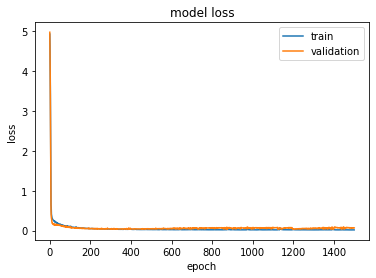

In [23]:
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [24]:
# evaluate model

preds = model.predict([X_test[:,np.r_[0:12,12]],X_test[:,np.r_[0:12,13]], X_test[:,np.r_[0:12,14]], 
                        X_test[:,np.r_[0:12,15]], X_test[:,np.r_[0:12,16]], X_test[:,np.r_[0:12,17]] ] )

targets = [X_test[:,19], X_test[:,20], X_test[:,21], X_test[:,22], X_test[:,23], X_test[:,24]]
    
uncorrected = [X_test[:,26], X_test[:,27], X_test[:,28], X_test[:,29], X_test[:,30], X_test[:,31]]


    
preds = preds.reshape(preds.shape[1],preds.shape[0])


for i in range (0,6):
    targets[i] = targets[i].reshape(targets[i].shape[0],1)
    uncorrected[i] = uncorrected[i].reshape(uncorrected[i].shape[0],1)
#print(preds[1])
#print(targets[1])
#print (uncorrected[1])

#print(len(targets[1]))
#print(len(uncorrected[1]))
#print(len(preds))
#print(targets[1])

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


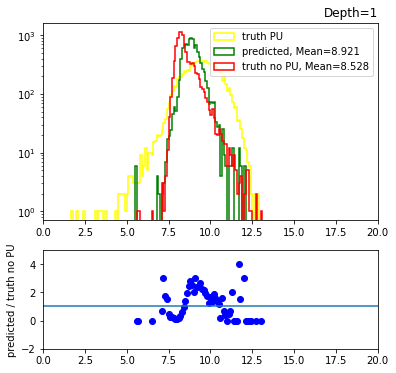

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


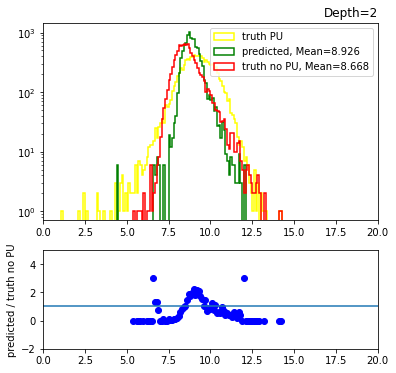

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


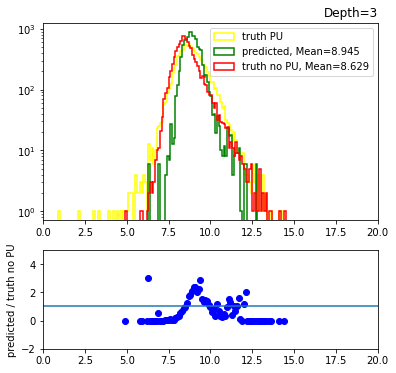

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


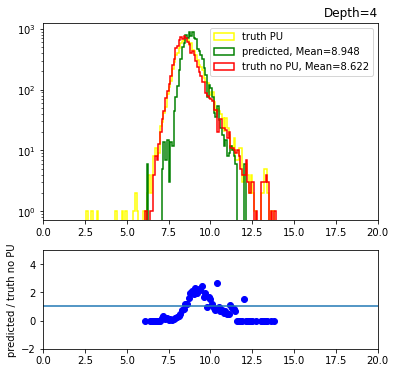

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in true_divide
/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


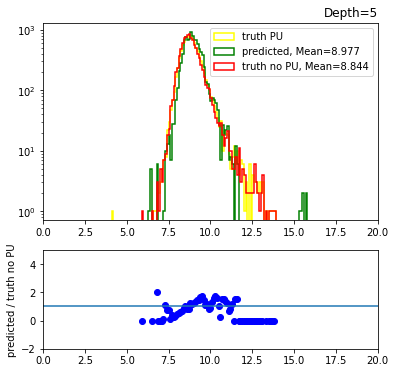

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


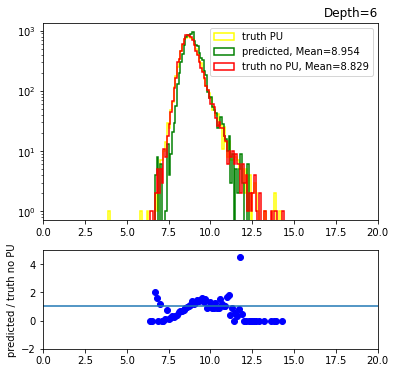

In [25]:
from matplotlib import gridspec
%matplotlib inline
i=0


for j in range (0,6):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(targets[j][:,i]),3)
    b=round(np.mean(preds[j]),3)
    ns, bins, patches = ax.hist([targets[j][:,i], preds[j], uncorrected[j][:,i]], 
                            histtype='step', bins=200,  range=(0,20), linewidth=1.5,
                            label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 'truth PU'], 
                            color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')    
    plt.xlim(0,20)
    k=j+1

    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 21], [1, 1])
    plt.xlim(0,20)
    plt.ylim(-2,5)
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.png')
    #plt.savefig('Log/ieta'+str(ieta)+'_'+str(k)+'_log.pdf')
    plt.show()


In [26]:
import statistics
b=(np.exp(preds[2])/10000)
print((np.exp(preds[0])/10000).mean())
print((np.exp(preds[1])/10000).mean())
print((np.exp(preds[2])/10000).mean())
print((np.exp(preds[3])/10000).mean())
print((np.exp(preds[4])/10000).mean())
print((np.exp(preds[5])/10000).mean())

0.910295
0.91928095
0.9731366
0.93762165
1.306232
0.9523057


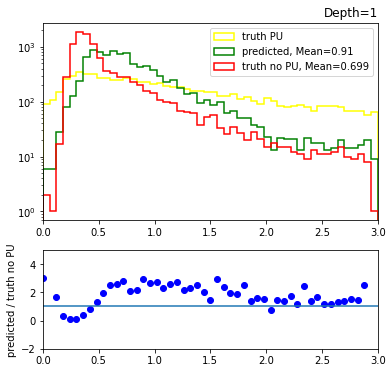

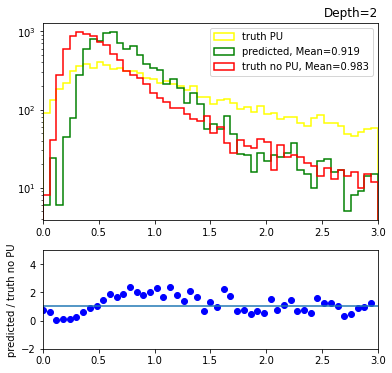

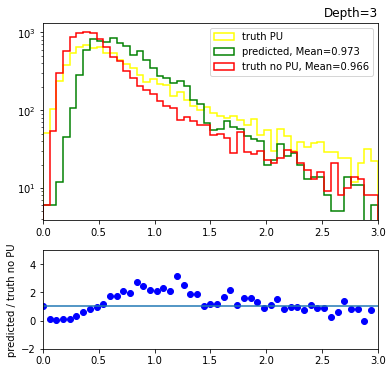

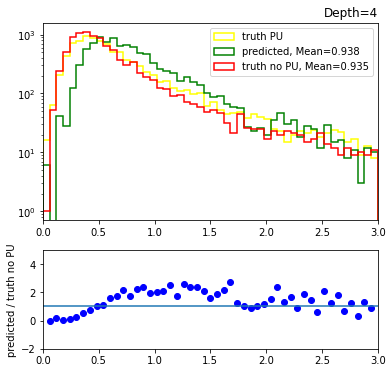

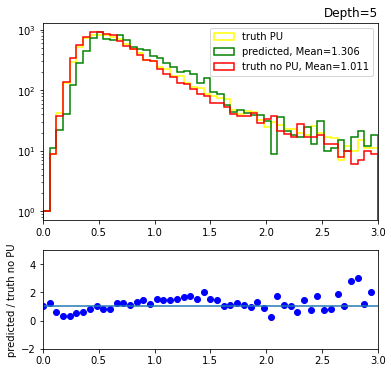

/home/cms.hkaur/py3-data-project/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide


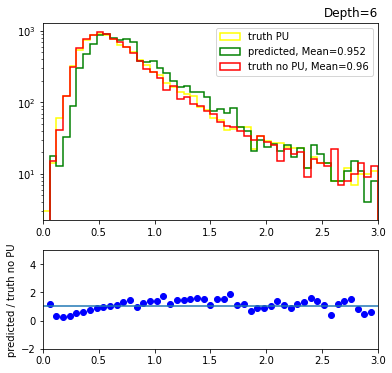

In [28]:
from matplotlib import gridspec
%matplotlib inline
i=0


for j in range (0,6):
    fig = plt.figure(figsize=(6,6))
    gs = gridspec.GridSpec(2,1, height_ratios=[2, 1]) 
    ax = plt.subplot(gs[0])
    a=round(np.mean(np.exp((targets[j][:,i]))/10000),3)
    b=round(np.mean(np.exp(preds[j])/10000),3)
    ns, bins, patches = ax.hist([(np.exp((targets[j][:,i]))/10000), (np.exp(preds[j])/10000),
                                 (np.exp(uncorrected[j][:,i])/10000)], histtype='step', bins=50,  range=(0,3), 
                                linewidth=1.5, label=['truth no PU, Mean='+str(a),'predicted, Mean='+str(b), 
                                                      'truth PU'], color= ['red', 'green', 'yellow'], )
    ax.legend(loc='upper right')
    ax.set_yscale('log')   
    plt.xlim(0,3)
    k=j+1

    plt.title('Depth='+str(k), loc='right')
    
    ax1 = plt.subplot(gs[1])
    ax1.plot(bins[:-1], ns[1] / ns[0], 'bo')
    plt.ylabel('predicted / truth no PU')
    ax1.plot([-1, 3], [1, 1])
    plt.xlim(0,3)
    plt.ylim(-2,5)
    plt.savefig('nonLog1/Depth='+str(k)+'_nonLog.png')
    plt.savefig('nonLog1/Depth='+str(k)+'_nonLog.pdf')
    plt.show()
    



In [17]:
#save model
import os
if not os.path.exists('model'):
    os.makedirs('model')
model.save('model/model_ieta'+str(ieta)+'.h5')

In [18]:
import h5py
hf=h5py.File('model/model_ieta'+str(ieta)+'.h5','r')
hf.keys()

<KeysViewHDF5 ['model_weights', 'optimizer_weights']>